#**Tugas Besar Pembelajaran Mesin - Tahap 2: Classification**

Musthafa Zaki Bahar (1301190335)
<br> Fadlan Akmal Ramadhan (1301190351)
<br> Kelas : IF-43-12

# Persiapan Data

In [ ]:
# Import Library yang Dibutuhkan 
import pandas as pd
import numpy as np
import math
import statistics
import matplotlib.pyplot as plt
import random
import time

In [ ]:
# Read dataset yang akan digunakan 
data = pd.read_csv("https://raw.githubusercontent.com/mzakibhr/Tubes2_ML_Classification/main/kendaraan_train.csv")
data_test = pd.read_csv("https://raw.githubusercontent.com/mzakibhr/Tubes2_ML_Classification/main/kendaraan_test.csv")
data.head(5)

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0


# Preprocessing

In [ ]:
# Mencari Jumlah Missing Value pada data_train
print(data.isnull().sum())
data.shape

id                       0
Jenis_Kelamin        14440
Umur                 14214
SIM                  14404
Kode_Daerah          14306
Sudah_Asuransi       14229
Umur_Kendaraan       14275
Kendaraan_Rusak      14188
Premi                14569
Kanal_Penjualan      14299
Lama_Berlangganan    13992
Tertarik                 0
dtype: int64


(285831, 12)

In [ ]:
# Mencari Jumlah Missing Value pada data_test
print(data_test.isnull().sum())
data_test.shape

Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
Tertarik             0
dtype: int64


(47639, 11)

In [ ]:
# Drop Kolom id
data = data.drop(axis=1, columns=["id"])

In [ ]:
# Mengecek tipe data tiap kolom
data.dtypes

Jenis_Kelamin         object
Umur                 float64
SIM                  float64
Kode_Daerah          float64
Sudah_Asuransi       float64
Umur_Kendaraan        object
Kendaraan_Rusak       object
Premi                float64
Kanal_Penjualan      float64
Lama_Berlangganan    float64
Tertarik               int64
dtype: object

In [ ]:
data.head(5)

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0


Label Encoding

In [ ]:
# Kendaraan Rusak
scale_Kendaraan_Rusak = {"Tidak":0,"Pernah":1}
data["Kendaraan_Rusak"] = data["Kendaraan_Rusak"].replace(scale_Kendaraan_Rusak)
data_test["Kendaraan_Rusak"] = data_test["Kendaraan_Rusak"].replace(scale_Kendaraan_Rusak)

# Jenis Kelamin
scale_Jenis_Kelamin = {"Wanita":0,"Pria":1}
data["Jenis_Kelamin"] = data["Jenis_Kelamin"].replace(scale_Jenis_Kelamin)
data_test["Jenis_Kelamin"] = data_test["Jenis_Kelamin"].replace(scale_Jenis_Kelamin)

# Umur Kendaraan
scale_Umur_Kendaraan = {"< 1 Tahun":0,"1-2 Tahun":1 ,"> 2 Tahun":2}
data["Umur_Kendaraan"] = data["Umur_Kendaraan"].replace(scale_Umur_Kendaraan)
data_test["Umur_Kendaraan"] = data_test["Umur_Kendaraan"].replace(scale_Umur_Kendaraan)

data.head(10)


,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,0.0,30.0,1.0,33.0,1.0,0.0,0.0,28029.0,152.0,97.0,0
1,1.0,48.0,1.0,39.0,0.0,2.0,1.0,25800.0,29.0,158.0,0
2,NaN,21.0,1.0,46.0,1.0,0.0,0.0,32733.0,160.0,119.0,0
3,0.0,58.0,1.0,48.0,0.0,1.0,0.0,2630.0,124.0,63.0,0
4,1.0,50.0,1.0,35.0,0.0,2.0,NaN,34857.0,88.0,194.0,0
5,1.0,21.0,1.0,35.0,1.0,0.0,0.0,22735.0,152.0,171.0,0
6,0.0,33.0,1.0,8.0,0.0,NaN,1.0,32435.0,124.0,215.0,1
7,1.0,23.0,NaN,28.0,1.0,0.0,0.0,26869.0,152.0,222.0,0
8,0.0,20.0,1.0,8.0,1.0,0.0,0.0,30786.0,160.0,31.0,0
9,NaN,54.0,1.0,29.0,0.0,2.0,1.0,88883.0,124.0,28.0,1


In [ ]:
data_test.head(10)

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,0,49,1,8,0,1,1,46963,26,145,0
1,1,22,1,47,1,0,0,39624,152,241,0
2,1,24,1,28,1,0,0,110479,152,62,0
3,1,46,1,8,1,1,0,36266,124,34,0
4,1,35,1,23,0,1,1,26963,152,229,0
5,1,26,1,28,1,0,0,42721,152,198,0
6,0,24,1,28,1,0,0,65801,152,160,0
7,0,40,1,28,0,1,1,30981,26,79,0
8,1,23,1,15,1,0,0,32365,152,219,0
9,0,43,1,28,0,1,1,65380,25,41,1


Handling Missing Value

In [ ]:
# Mengganti Missing Value pada data train dengan nilai mean/modus
# Mean
data['Umur'] = data['Umur'].fillna(data['Umur'].mean())
data['Premi'] = data['Premi'].fillna(data['Premi'].mean())
data['Lama_Berlangganan'] = data['Lama_Berlangganan'].fillna(data['Lama_Berlangganan'].mean())

# Modus
data['Jenis_Kelamin'] = data['Jenis_Kelamin'].fillna(data['Jenis_Kelamin'].mode()[0])
data['SIM'] = data['SIM'].fillna(data['SIM'].mode()[0])
data['Kode_Daerah'] = data['Kode_Daerah'].fillna(data['Kode_Daerah'].mode()[0])
data['Sudah_Asuransi'] = data['Sudah_Asuransi'].fillna(data['Sudah_Asuransi'].mode()[0])
data['Umur_Kendaraan'] = data['Umur_Kendaraan'].fillna(data['Umur_Kendaraan'].mode()[0])
data['Kendaraan_Rusak'] = data['Kendaraan_Rusak'].fillna(data['Kendaraan_Rusak'].mode()[0])
data['Kanal_Penjualan'] = data['Kanal_Penjualan'].fillna(data['Kanal_Penjualan'].mode()[0])

In [ ]:
# Export Data Hasil Preprocessing
data.to_csv("kendaraan_train_clean.csv")
data_test.to_csv("kendaraan_test_clean.csv")

# Pemodelan

**Naive Bayes**

In [ ]:
# Classicfication menggunakan algoritma Naive Bayes
class NaiveBayesClassifier():
    def density(self, class_idx, x):     
        # Implementasi Fungsi Gaussian Density untuk
        # Menghitung probabilitas distribusi data
        mean = self.mean[class_idx]
        var = self.var[class_idx]
        numerator = np.exp((-1/2)*((x-mean)**2)/(2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        probability = numerator / denominator
        return probability

    def statisticsCalculation(self, features, target):
        # Menghitung mean dan varian untuk setiap kolom
        # dan mengubah menjadi array numPy untuk perhitungan selanjutnya 
        self.mean = features.groupby(target).apply(np.mean).to_numpy()
        self.var = features.groupby(target).apply(np.var).to_numpy()      
        return self.mean, self.var

    def calculatePrior(self, features, target):
        # Menghitung peluang sebelumny
        self.prior = (features.groupby(target).apply(lambda x: len(x)) / self.rows).to_numpy()
        return self.prior

    def calculatePosterior(self, x):
        posteriors = []
        # Menghitung probabilitas posterior pada setiap kelas 
        for i in range(self.count):
            prior = np.log(self.prior[i])
            conditional = np.sum(np.log(self.density(i, x)))
            posterior = prior + conditional
            posteriors.append(posterior)

        # Mengembalikan kelas dengan probabilitas posterior tertinggi
        return self.classes[np.argmax(posteriors)]
        
    def fit(self, features, target):
        self.classes = np.unique(target)
        self.count = len(self.classes)
        self.feature_nums = features.shape[1]
        self.rows = features.shape[0]
        
        self.statisticsCalculation(features, target)
        self.calculatePrior(features, target)  

    def predict(self, features):
        predicted = [self.calculatePosterior(f) for f in features.to_numpy()]
        return predicted

**Logistic Regression**


In [ ]:
# Classicfication menggunakan Logistic Regression

class LogisticRegression() :
    def __init__(self, learning_rate, iterations) :        
        self.learning_rate = learning_rate        
        self.iterations = iterations
          
    # Fungsi untuk model training    
    def fit(self, X, Y) :        
        self.m, self.n = X.shape        
        # Inisialisasi weight        
        self.W = np.zeros(self.n)        
        self.b = 0        
        self.X = X        
        self.Y = Y
                            
        for i in range(self.iterations) :            
            self.update_weights()            
        return self
      
    # Fungsi untuk melakukan update weights
    def update_weights( self ) :           
        A = 1 / (1 + np.exp( - (self.X.dot(self.W) + self.b)))
          
        # Menghitung Gradients        
        tmp = (A - self.Y.T)        
        tmp = np.reshape(tmp, self.m)        
        dW = np.dot(self.X.T, tmp) / self.m         
        db = np.sum(tmp) / self.m 
          
        # update weights    
        self.W = self.W - self.learning_rate * dW    
        self.b = self.b - self.learning_rate * db         
        return self
            
    def predict( self, X ) :    
        Z = 1 / ( 1 + np.exp( - ( X.dot( self.W ) + self.b ) ) )        
        predicted = np.where( Z > 0.5, 1, 0 )        
        return predicted

# Eksperimen & Evaluasi

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import time
import seaborn as sns

In [ ]:
# Confusion Matrix
def confMatrix(y_test, prediction) :
    plt.figure(figsize=(7, 5))
    conf_matrix = confusion_matrix(y_test, prediction)
    sns.heatmap(conf_matrix, annot=True, xticklabels=[0, 1], yticklabels=[0, 1], cmap='flare', fmt='d')
    plt.ylabel('Actual Values')
    plt.xlabel('Predicted Values')
    plt.title(f'Confusion Matrix', pad=16)
    plt.show()

In [ ]:
# Percobaan Classification menggunakan Naive Bayes

# X_train dan y_train adalah data
X_train = data.drop("Tertarik", axis=1)
y_train = data["Tertarik"]

# X_test dan y_test adalah data test
X_test = data_test.drop("Tertarik", axis=1)
y_test = data_test["Tertarik"]

start = time.perf_counter()
x = NaiveBayesClassifier()
x.fit(X_train, y_train)
predictions = x.predict(X_test)
end = time.perf_counter()

# Hasil akurasi Naive Bayes
print(f"Naive Bayes accuracy: {accuracy_score(y_test, predictions)}")
print(f'Finished in {round(end-start, 3)} second(s)\n')

Naive Bayes accuracy: 0.6395600243497974
Finished in 3.068 second(s)



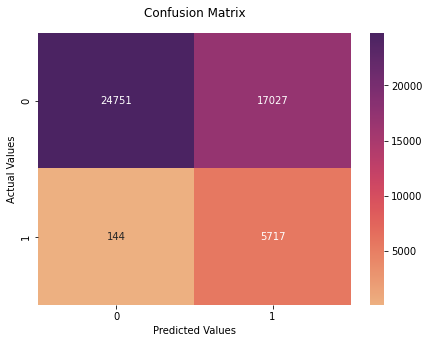


               precision    recall  f1-score   support

           0       0.99      0.59      0.74     41778
           1       0.25      0.98      0.40      5861

    accuracy                           0.64     47639
   macro avg       0.62      0.78      0.57     47639
weighted avg       0.90      0.64      0.70     47639




In [ ]:
# Evaluasi Percobaan Naive Bayes menggunakan confusion matrix
confMatrix(y_test, predictions)
print("\n", classification_report(y_test, predictions), end="\n\n")

In [ ]:
# Percobaan Classification menggunakan Logistic Regression

# X_train dan y_train adalah data
X_train = data.drop("Tertarik", axis=1)
y_train = data["Tertarik"]

# X_test dan y_test adalah data test
X_test = data_test.drop("Tertarik", axis=1)
y_test = data_test["Tertarik"]

start = time.perf_counter()
x = LogisticRegression(learning_rate = 0.01, iterations = 1000) 
x.fit(X_train, y_train)
predictions = x.predict(X_test)
end = time.perf_counter()

# Hasil akurasi Naive Bayes
print(f"Logistic Regression accuracy: {accuracy_score(y_test, predictions)}")
print(f'Finished in {round(end-start, 3)} second(s)\n')

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


Logistic Regression accuracy: 0.8769705493398267
Finished in 23.436 second(s)



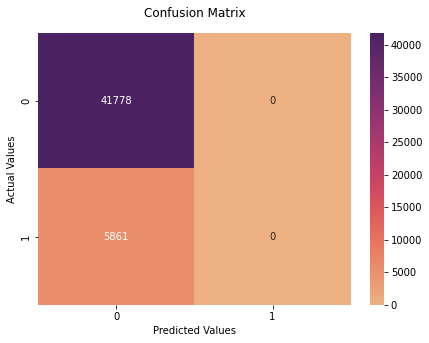


               precision    recall  f1-score   support

           0       0.88      1.00      0.93     41778
           1       0.00      0.00      0.00      5861

    accuracy                           0.88     47639
   macro avg       0.44      0.50      0.47     47639
weighted avg       0.77      0.88      0.82     47639




/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Evaluasi Percobaan Logistic Regression menggunakan Confusion Matrix
confMatrix(y_test, predictions)
print("\n", classification_report(y_test, predictions), end="\n\n")